## *Introduction*

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, we are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

#### *So here we would use Logistic Regression (with RFE) to build a model to predict wether the passengers are transported correctly or not.*

## *Data File Path*

In [1]:
# Checking data file path.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## *Importing Libraries*

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## *Data Reading*

In [3]:
# Loading Train Dataset 

train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
#Loading Test Dataset

test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
#Checking info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
#Checking the distributions for numerical columns.

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### *Checking Nulls*

In [8]:
#Chesking nulls in Train Dataset.

train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
#Checking valuecounts for imputing Nulls

train.HomePlanet.value_counts(dropna=False,normalize=True)

Earth     0.529391
Europa    0.245140
Mars      0.202347
NaN       0.023122
Name: HomePlanet, dtype: float64

In [10]:
#Imputing HomePlanet attribute with Earth for NaN's

train['HomePlanet']=train.HomePlanet.fillna(train.HomePlanet.mode()[0])

In [11]:
# Checking for any Nulls 

train.HomePlanet.value_counts(dropna=False,normalize=True)

Earth     0.552514
Europa    0.245140
Mars      0.202347
Name: HomePlanet, dtype: float64

In [12]:
#Displaying Train dataset head

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
#Checking NaN's for Cryosleep 

train.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [14]:
#Imputing Cryosleep attribute with mode for Nan's

train['CryoSleep']=train.CryoSleep.fillna(train.CryoSleep.mode()[0])

In [15]:
# Removing Rows with nulls in Cabin attribute as there is no point in imputing them

train=train[~train.Cabin.isna()]

In [16]:
#Checking for Nulls in Destination column

train.Destination.value_counts(dropna=False)

TRAPPIST-1e      5788
55 Cancri e      1750
PSO J318.5-22     778
NaN               178
Name: Destination, dtype: int64

In [17]:
# Imputing Nulls with mode

train['Destination']=train.Destination.fillna(train.Destination.mode()[0])

In [18]:
#Checking features of Age Column.

train.Age.describe()

count    8319.000000
mean       28.820411
std        14.488090
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [19]:
#Filling Age NaN's with Median value 

train['Age']=train.Age.fillna(train.Age.median())

In [20]:
#Checking Value counts for VIP column.

train.VIP.value_counts(dropna=False)

False    8104
NaN       197
True      193
Name: VIP, dtype: int64

In [21]:
#Imputing the NaN's VIP Column with mode

train['VIP']=train.VIP.fillna(train.VIP.mode()[0])

In [22]:
# Removing rows with Nulls in Numerical Columns.

train=train[~train.RoomService.isna()]
train=train[~train.FoodCourt.isna()]
train=train[~train.ShoppingMall.isna()]
train=train[~train.Spa.isna()]
train=train[~train.VRDeck.isna()]

In [23]:
#Checking Nulls in Dataset.

train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            178
Transported       0
dtype: int64

In [24]:
# Dropping Rows with empty Names

train=train[~train.Name.isna()]

In [25]:
#Checking d-types for all the attributes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7425 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7425 non-null   object 
 1   HomePlanet    7425 non-null   object 
 2   CryoSleep     7425 non-null   bool   
 3   Cabin         7425 non-null   object 
 4   Destination   7425 non-null   object 
 5   Age           7425 non-null   float64
 6   VIP           7425 non-null   bool   
 7   RoomService   7425 non-null   float64
 8   FoodCourt     7425 non-null   float64
 9   ShoppingMall  7425 non-null   float64
 10  Spa           7425 non-null   float64
 11  VRDeck        7425 non-null   float64
 12  Name          7425 non-null   object 
 13  Transported   7425 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 717.8+ KB


In [26]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
#Changing dtype of CryoSleep,VIP & Transported to int

train['CryoSleep']=train.CryoSleep.astype(int)
train['VIP']=train.VIP.astype(int)
train['Transported']=train.Transported.astype(int)

## *Checking Outliers*

<AxesSubplot:>

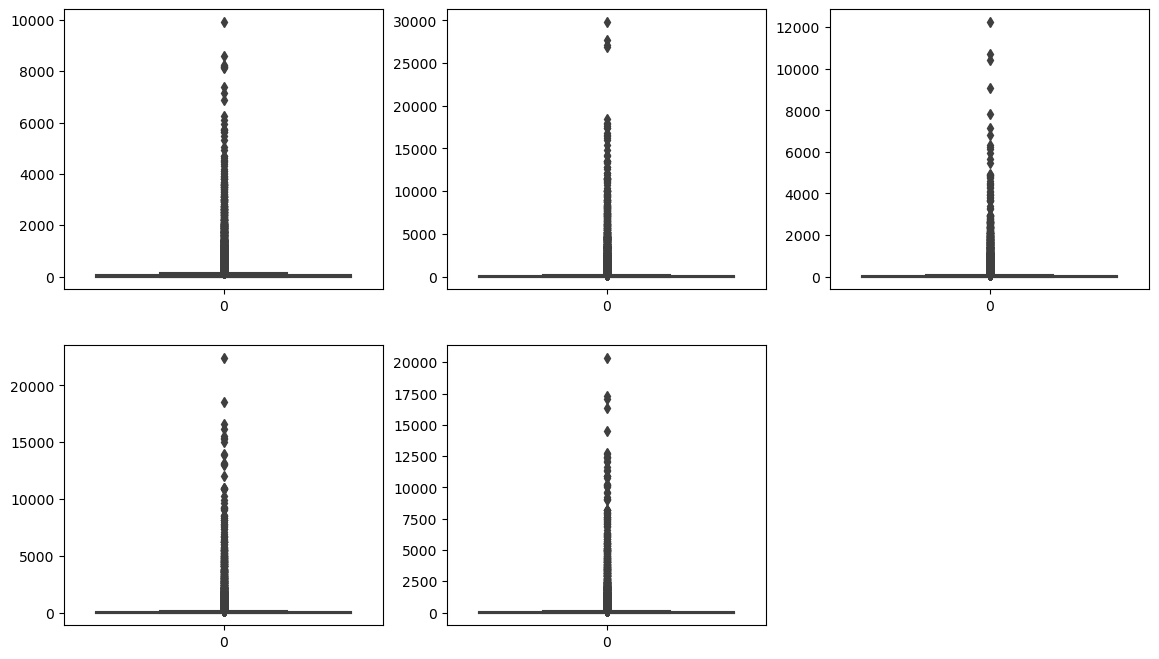

In [28]:
#Plotting boxplot for all the numerical Columns to check for outliers.

plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.boxplot(train.RoomService)
plt.subplot(2,3,2)
sns.boxplot(train.FoodCourt)
plt.subplot(2,3,3)
sns.boxplot(train.ShoppingMall)
plt.subplot(2,3,4)
sns.boxplot(train.Spa)
plt.subplot(2,3,5)
sns.boxplot(train.VRDeck)

## *Correlation Matrix*

<AxesSubplot:>

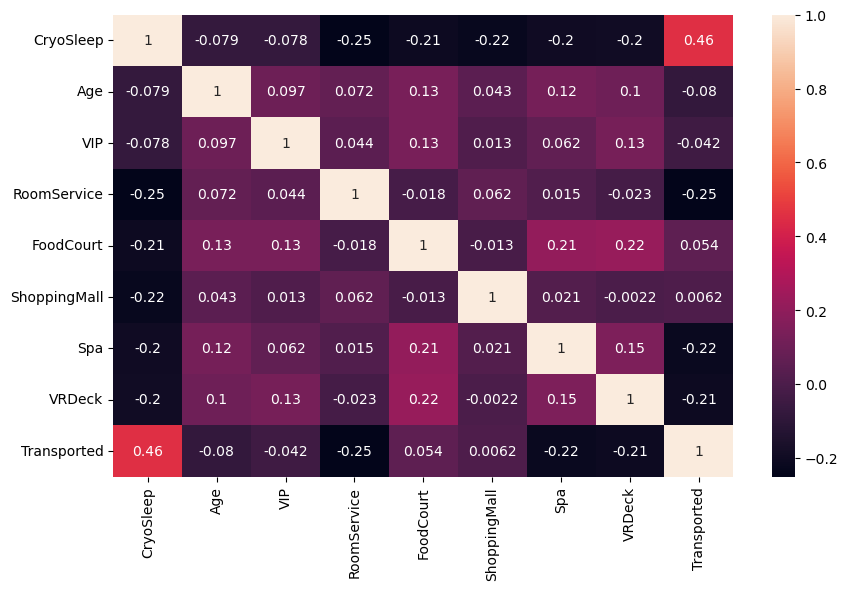

In [29]:
#Plotting a correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

In [30]:
#Splitting the cabin column into 3 Different columns for futher analysis

string=train.Cabin.str.split('/')
train['Deck']=string.map(lambda string:string[0])
train['Num']=string.map(lambda string:string[1])
train['Side']=string.map(lambda string:string[2])

In [31]:
#Confirming that 3 new columns are added.

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [32]:
#Dropping unnecessary columns.

train=train.drop(columns=['PassengerId','Cabin','Name','Num'],axis=1)

In [33]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S


In [34]:
#Making bins for the Age group

bins=[0,18,40,100]
labels=['teen','adult','senior']
train['Age_group']=pd.cut(train.Age,bins=bins,labels=labels)

In [35]:
#Dropping Age column

train=train.drop(columns=['Age'])

## *Making Dummies*

In [36]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Age_group
0,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,B,P,adult
1,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,F,S,adult
2,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,senior
3,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S,adult
4,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,F,S,teen


In [37]:
#Creating dummies for Continuous variables 

dummy1=pd.get_dummies(train[['HomePlanet','Destination','Age_group','Side','Deck']],drop_first=True)

In [38]:
#Concatinating the dummy columns to train dataset and dropping parent columns.

train=pd.concat([train,dummy1],axis=1)
train=train.drop(columns=['HomePlanet',"Destination",'Age_group','Side','Deck'])

In [39]:
train.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Age_group_adult,Age_group_senior,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

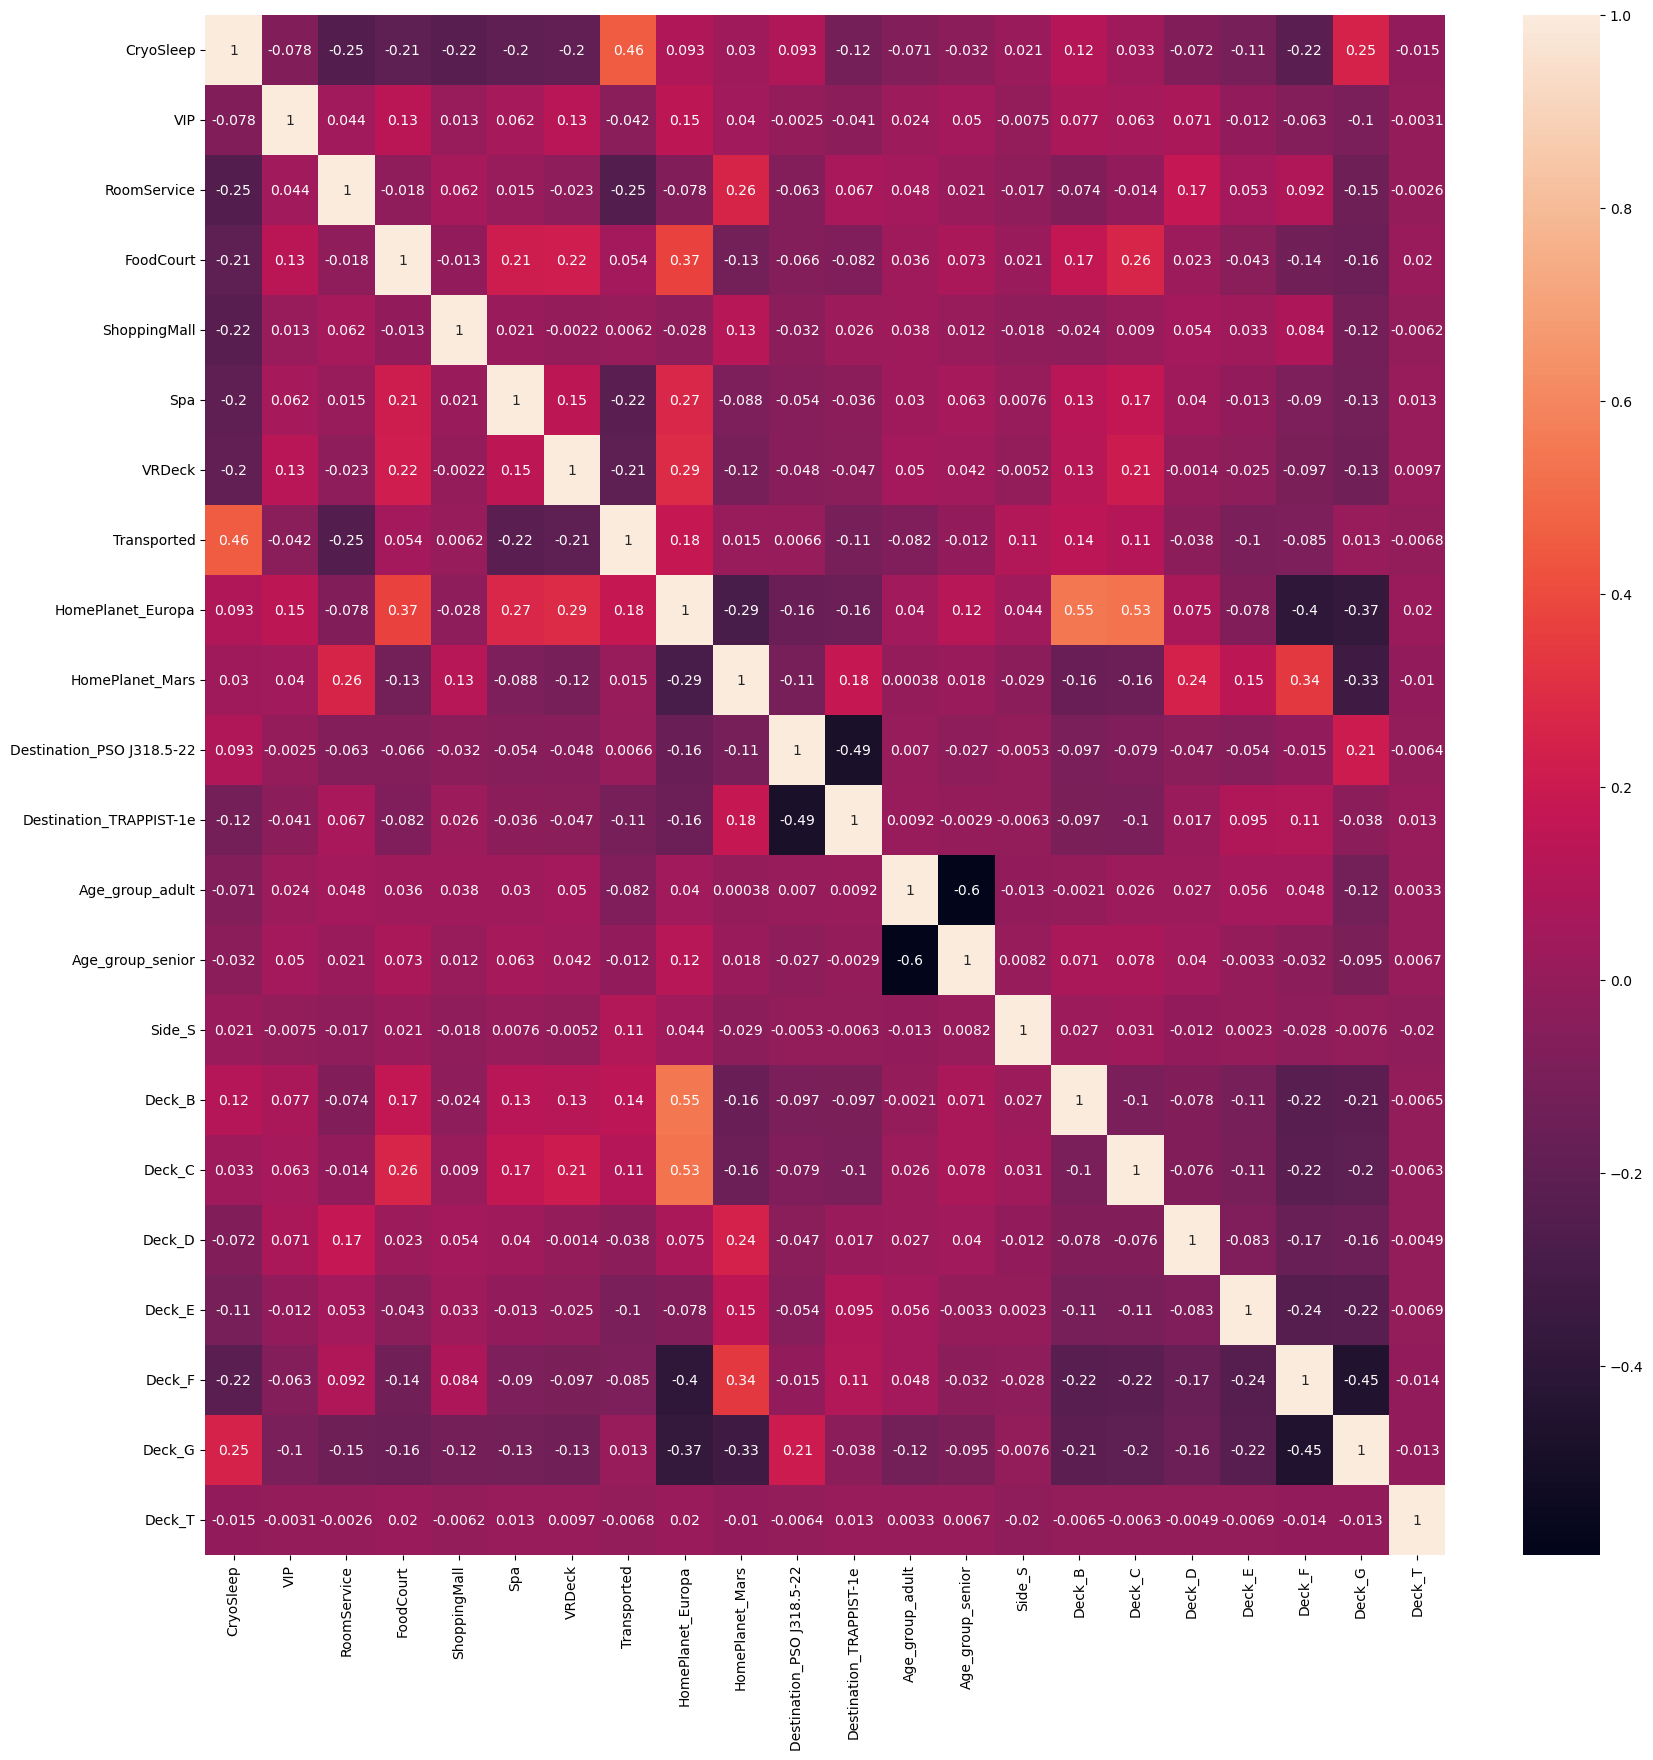

In [40]:
#Plotting a correlation matrix for checking the correlation.

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

## *Scaling the Features*

In [41]:
#Assigning X and y variables 

from sklearn.model_selection import train_test_split
X=train.drop('Transported',axis=1)
y=train['Transported']

In [42]:
#Creating X_train and X_test

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [43]:
#Checking shape of X_train
X_train.shape

(5197, 21)

In [44]:
#Using Standard scaler for scaling the features on train dataset.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=scaler.fit_transform(X_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [45]:
X_train.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,...,Age_group_adult,Age_group_senior,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
1880,0,0,-0.338314,3.109755,-0.304769,-0.266410,-0.278669,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4067,0,0,-0.338314,-0.264345,0.841913,-0.270564,-0.219272,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5059,0,0,-0.308405,2.059456,-0.039350,-0.037940,1.324093,1,0,0,...,1,0,1,1,0,0,0,0,0,0
1833,0,0,-0.338314,-0.285067,0.869670,-0.267241,-0.279627,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4133,0,0,-0.338314,0.198639,0.368321,-0.205761,0.384279,1,0,0,...,0,1,1,0,1,0,0,0,0,0


## *Build a Model*


In [46]:
#Checking the Class Imbalance

sum(train['Transported']/len(train['Transported']))*100

50.276094276097226

In [47]:
#Building the first model

import statsmodels.api as sm
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5197
Model:                            GLM   Df Residuals:                     5175
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2220.8
Date:                Sun, 19 Feb 2023   Deviance:                       4441.6
Time:                        14:15:17   Pearson chi2:                 5.19e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4123
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0430      0.393     -2.657      0.008      -1.812      -0.274
CryoSleep                     1.3365      0.103     12.935      0.000       1.134       1.539
VIP                          -0.4719      0.334     -1.412      0.158      -1.127       0.183
RoomService                  -1.0138      0.079    -12.784      0.000      -1.169      -0.858
FoodCourt                     0.9677      0.093     10.460      0.000       0.786       1.149
ShoppingMall                  0.3168      0.051      6.244      0.000       0.217       0.416
Spa                          -2.7111      0.177    -15.341      0.000      -3.058      -2.365
VRDeck                       -2.2046      0.148    -14.937      0.000      -2.494      -1.915
HomePlanet_Europa             1.0164      0.277      3.669      0.000       0.473       1.559
HomePlanet_Mars               0.4149      0.120      3.471      0.001       0.181       0.649
Destination_PSO J318.5-22    -0.4500      0.147     -3.064      0.002      -0.738      -0.162
Destination_TRAPPIST-1e      -0.5356      0.105     -5.077      0.000      -0.742      -0.329
Age_group_adult              -0.3189      0.092     -3.455      0.001      -0.500      -0.138
Age_group_senior             -0.3176      0.119     -2.664      0.008      -0.551      -0.084
Side_S                        0.5933      0.075      7.933      0.000       0.447       0.740
Deck_B                        1.1200      0.346      3.237      0.001       0.442       1.798
Deck_C                        2.1281      0.383      5.556      0.000       1.377       2.879
Deck_D                        0.3174      0.373      0.850      0.395      -0.414       1.049
Deck_E                       -0.3702      0.370     -1.001      0.317      -1.095       0.355
Deck_F                        0.2397      0.376      0.638      0.523      -0.497       0.976
Deck_G                       -0.3890      0.386     -1.008      0.313      -1.145       0.367
Deck_T                       -9.8310   1.77e+04     -0.001      1.000   -3.48e+04    3.47e+04
=============================================================================================
"""

## *Feature selection using RFE*

In [48]:
#Importing Logistric Regression

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [49]:
#Using Logreg to create 15 features.

from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [50]:
#Displaying the list of columns with rfe ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('CryoSleep', True, 1),
 ('VIP', True, 1),
 ('RoomService', True, 1),
 ('FoodCourt', True, 1),
 ('ShoppingMall', False, 2),
 ('Spa', True, 1),
 ('VRDeck', True, 1),
 ('HomePlanet_Europa', True, 1),
 ('HomePlanet_Mars', True, 1),
 ('Destination_PSO J318.5-22', True, 1),
 ('Destination_TRAPPIST-1e', True, 1),
 ('Age_group_adult', False, 3),
 ('Age_group_senior', False, 4),
 ('Side_S', True, 1),
 ('Deck_B', True, 1),
 ('Deck_C', True, 1),
 ('Deck_D', False, 5),
 ('Deck_E', True, 1),
 ('Deck_F', False, 6),
 ('Deck_G', True, 1),
 ('Deck_T', False, 7)]

In [51]:
#Considering only the columns that are selected by rfe.

col=X_train.columns[rfe.support_]
col

Index(['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Side_S', 'Deck_B', 'Deck_C', 'Deck_E',
       'Deck_G'],
      dtype='object')

In [52]:
X_train[col]

,CryoSleep,VIP,RoomService,FoodCourt,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck_B,Deck_C,Deck_E,Deck_G
1880,0,0,-0.338314,3.109755,-0.266410,-0.278669,1,0,0,0,1,0,0,0,0
4067,0,0,-0.338314,-0.264345,-0.270564,-0.219272,0,0,0,1,1,0,0,0,0
5059,0,0,-0.308405,2.059456,-0.037940,1.324093,1,0,0,1,1,1,0,0,0
1833,0,0,-0.338314,-0.285067,-0.267241,-0.279627,0,0,1,0,0,0,0,1,0
4133,0,0,-0.338314,0.198639,-0.205761,0.384279,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,-0.338314,-0.285067,-0.268902,-0.154127,0,0,0,1,0,0,0,0,0
4654,0,0,-0.338314,-0.145935,0.123236,-0.279627,0,0,0,1,1,0,0,0,1
7011,1,0,-0.338314,-0.285067,-0.270564,-0.279627,0,0,0,1,1,0,0,0,1
8126,0,0,0.212008,0.010366,-0.270564,-0.277711,0,1,0,1,0,0,0,0,0


In [53]:
#Building second model with rfe features.
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5197
Model:                            GLM   Df Residuals:                     5181
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2247.1
Date:                Sun, 19 Feb 2023   Deviance:                       4494.2
Time:                        14:15:18   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0296      0.121     -8.480      0.000      -1.268      -0.792
CryoSleep                     1.1199      0.099     11.354      0.000       0.927       1.313
VIP                          -0.4725      0.332     -1.421      0.155      -1.124       0.179
RoomService                  -1.0905      0.079    -13.761      0.000      -1.246      -0.935
FoodCourt                     0.9077      0.092      9.894      0.000       0.728       1.088
Spa                          -2.8129      0.175    -16.033      0.000      -3.157      -2.469
VRDeck                       -2.3076      0.149    -15.503      0.000      -2.599      -2.016
HomePlanet_Europa             0.9869      0.203      4.853      0.000       0.588       1.386
HomePlanet_Mars               0.5389      0.114      4.728      0.000       0.316       0.762
Destination_PSO J318.5-22    -0.4750      0.145     -3.278      0.001      -0.759      -0.191
Destination_TRAPPIST-1e      -0.5566      0.104     -5.334      0.000      -0.761      -0.352
Side_S                        0.5791      0.074      7.820      0.000       0.434       0.724
Deck_B                        0.9896      0.284      3.489      0.000       0.434       1.545
Deck_C                        2.0928      0.328      6.389      0.000       1.451       2.735
Deck_E                       -0.6286      0.124     -5.068      0.000      -0.872      -0.385
Deck_G                       -0.5894      0.104     -5.659      0.000      -0.793      -0.385
=============================================================================================
"""

In [54]:
X_train=X_train[col]

In [55]:
#Dropping VIP as its p-value is greater than 0.05

X_train=X_train.drop('VIP',axis=1)

In [56]:
#Building third Regression model

X_train_sm=sm.add_constant(X_train)
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transported   No. Observations:                 5197
Model:                            GLM   Df Residuals:                     5182
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2248.1
Date:                Sun, 19 Feb 2023   Deviance:                       4496.3
Time:                        14:15:18   Pearson chi2:                 8.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0326      0.121     -8.503      0.000      -1.271      -0.795
CryoSleep                     1.1268      0.099     11.437      0.000       0.934       1.320
RoomService                  -1.0949      0.079    -13.822      0.000      -1.250      -0.940
FoodCourt                     0.9043      0.092      9.842      0.000       0.724       1.084
Spa                          -2.8108      0.175    -16.052      0.000      -3.154      -2.468
VRDeck                       -2.3148      0.149    -15.535      0.000      -2.607      -2.023
HomePlanet_Europa             0.9694      0.203      4.785      0.000       0.572       1.366
HomePlanet_Mars               0.5213      0.113      4.602      0.000       0.299       0.743
Destination_PSO J318.5-22    -0.4785      0.145     -3.301      0.001      -0.763      -0.194
Destination_TRAPPIST-1e      -0.5552      0.104     -5.320      0.000      -0.760      -0.351
Side_S                        0.5803      0.074      7.837      0.000       0.435       0.725
Deck_B                        0.9596      0.281      3.410      0.001       0.408       1.511
Deck_C                        2.1010      0.328      6.407      0.000       1.458       2.744
Deck_E                       -0.6347      0.124     -5.123      0.000      -0.878      -0.392
Deck_G                       -0.5946      0.104     -5.710      0.000      -0.799      -0.390
=============================================================================================
"""

In [57]:
#Predicting the values using the model built.

y_train_pred=res.predict(X_train_sm)

In [58]:
y_train_pred

1880    0.993900
4067    0.596744
5059    0.540680
1833    0.346438
4133    0.909020
          ...   
98      0.410338
4654    0.256784
7011    0.739842
8126    0.528473
6643    0.735312
Length: 5197, dtype: float64

In [59]:
y_train_pred=y_train_pred.values.reshape(-1)

In [60]:
#Checking the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif           

,features,VIF
5,HomePlanet_Europa,4.37
8,Destination_TRAPPIST-1e,2.72
0,CryoSleep,2.33
10,Deck_B,2.31
13,Deck_G,2.25
11,Deck_C,2.24
9,Side_S,1.83
6,HomePlanet_Mars,1.82
2,FoodCourt,1.28
7,Destination_PSO J318.5-22,1.27


In [61]:
#Creating a new DataFrame with train values and the predicted values

y_train_pred_final=pd.DataFrame({'Transported':y_train.values,'Trans_pred':y_train_pred})

In [62]:
#Assigning the predicted values as 1 with predicted value more than 0.47

y_train_pred_final['Predicted']=y_train_pred_final.Trans_pred.map(lambda x: 1 if x>0.47 else 0)

In [63]:
y_train_pred_final

,Transported,Trans_pred,Predicted
0,1,0.993900,1
1,1,0.596744,1
2,0,0.540680,1
3,1,0.346438,0
4,1,0.909020,1
...,...,...,...
5192,0,0.410338,0
5193,0,0.256784,0
5194,1,0.739842,1
5195,0,0.528473,1


In [64]:
#Calculating Accuracy Score on train Dataset

from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Transported,y_train_pred_final.Predicted))

0.7954589186068886


## *Test Dataset*

In [65]:
#Checking Test Datset.

test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [66]:
#Checking for nulls in Test Dataset.

test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [67]:
#Imputing the Categorical columns NaN's with mode.

test.HomePlanet=test.HomePlanet.fillna(test.HomePlanet.mode()[0])
test.Cabin=test.Cabin.fillna(test.Cabin.mode()[0])
test.Destination=test.Destination.fillna(test.Destination.mode()[0])

In [68]:
#Imputing Numerical columns NaN's with median.

test.CryoSleep=test.CryoSleep.fillna(test.CryoSleep.median())
test.Age=test.Age.fillna(test.Age.median())
test.VIP=test.VIP.fillna(test.VIP.median())
test.RoomService=test.RoomService.fillna(test.RoomService.median())
test.FoodCourt=test.FoodCourt.fillna(test.FoodCourt.median())
test.ShoppingMall=test.ShoppingMall.fillna(test.ShoppingMall.median())
test.Spa=test.Spa.fillna(test.Spa.median())
test.VRDeck=test.VRDeck.fillna(test.VRDeck.median())

In [69]:
#Checking Nulls again in test dataset.
test.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [70]:
#Dropping the rows with empty Name column.
test=test.drop(columns=['Name'],axis=1)

In [71]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [72]:
#Changing the dtype of CryoSleep and VIP from bool to int.

test.CryoSleep=test.CryoSleep.astype(int)
test.VIP=test.VIP.astype(int)

In [73]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


In [74]:
#Splitting the cabin column into 3 new columns.

string=test.Cabin.str.split('/')
test['Deck']=string.map(lambda string:string[0])
test['Num']=string.map(lambda string:string[1])
test['Side']=string.map(lambda string:string[2])
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5,S


In [75]:
#Dropping unnecessary columns.

test=test.drop(columns=['Cabin','Num'])

In [76]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,S


In [77]:
#Creating bins for Age Group and then dropping age column.

bins=[0,18,40,100]
labels=['teen','adult','senior']
test['Age_group']=pd.cut(test.Age,bins=bins,labels=labels)
test=test.drop('Age',axis=1)

In [78]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,Age_group
0,0013_01,Earth,1,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,G,S,adult
1,0018_01,Earth,0,TRAPPIST-1e,0,0.0,9.0,0.0,2823.0,0.0,F,S,adult
2,0019_01,Europa,1,55 Cancri e,0,0.0,0.0,0.0,0.0,0.0,C,S,adult
3,0021_01,Europa,0,TRAPPIST-1e,0,0.0,6652.0,0.0,181.0,585.0,C,S,adult
4,0023_01,Earth,0,TRAPPIST-1e,0,10.0,0.0,635.0,0.0,0.0,F,S,adult


In [79]:
#Creating dummy variables for the categorical columns.

dummy2=pd.get_dummies(test[['HomePlanet','Destination','Age_group','Side','Deck']],drop_first=True)
test=test.drop(columns=['HomePlanet','Destination','Age_group','Side','Deck'],axis=1)

In [80]:
#Concatinating the dummy variables df with test dataset.

test=pd.concat([test,dummy2],axis=1)

In [81]:
test.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Age_group_adult,Age_group_senior,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0013_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,0018_01,0,0,0.0,9.0,0.0,2823.0,0.0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0019_01,1,0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,1,0,1,0,0,0,0,0
3,0021_01,0,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,1,0,1,0,1,0,0,0,0,0
4,0023_01,0,0,10.0,0.0,635.0,0.0,0.0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [82]:
#Using scaler function to scale the numerical columns.

test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=scaler.transform(test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [83]:
test.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Age_group_adult,Age_group_senior,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0013_01,1,0,-0.338314,-0.285067,-0.304769,-0.270564,-0.279627,0,0,...,1,0,1,0,0,0,0,0,1,0
1,0018_01,0,0,-0.338314,-0.279739,-0.304769,2.074787,-0.279627,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0019_01,1,0,-0.338314,-0.285067,-0.304769,-0.270564,-0.279627,1,0,...,1,0,1,0,1,0,0,0,0,0
3,0021_01,0,0,-0.338314,3.653258,-0.304769,-0.120189,0.280813,1,0,...,1,0,1,0,1,0,0,0,0,0
4,0023_01,0,0,-0.323359,-0.285067,0.796809,-0.270564,-0.279627,0,0,...,1,0,1,0,0,0,0,1,0,0


In [84]:
X_train.columns

Index(['CryoSleep', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Side_S', 'Deck_B', 'Deck_C', 'Deck_E',
       'Deck_G'],
      dtype='object')

In [85]:
test.columns

Index(['PassengerId', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Age_group_adult', 'Age_group_senior', 'Side_S', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [86]:
#Dropping the columns to match with the train dataset.

test=test.drop(columns=['VIP','ShoppingMall','Age_group_adult', 'Age_group_senior', 'Deck_D','Deck_F','Deck_T'],axis=1)

In [87]:
test.head()

,PassengerId,CryoSleep,RoomService,FoodCourt,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck_B,Deck_C,Deck_E,Deck_G
0,0013_01,1,-0.338314,-0.285067,-0.270564,-0.279627,0,0,0,1,1,0,0,0,1
1,0018_01,0,-0.338314,-0.279739,2.074787,-0.279627,0,0,0,1,1,0,0,0,0
2,0019_01,1,-0.338314,-0.285067,-0.270564,-0.279627,1,0,0,0,1,0,1,0,0
3,0021_01,0,-0.338314,3.653258,-0.120189,0.280813,1,0,0,1,1,0,1,0,0
4,0023_01,0,-0.323359,-0.285067,-0.270564,-0.279627,0,0,0,1,1,0,0,0,0


In [88]:
#creating a copy of test dataset.

test_copy=test.copy()

In [89]:
#Assigning the data to test by dropping passenger id.

test=test.drop(['PassengerId'],axis=1)

In [90]:
#Predicting the values using the final model built.

test_sm=sm.add_constant(test)
test_pred=res.predict(test_sm)
test_pred

0       0.739842
1       0.002295
2       0.994859
3       0.995613
4       0.621640
          ...   
4272    0.739842
4273    0.365594
4274    0.894342
4275    0.764401
4276    0.754332
Length: 4277, dtype: float64

In [91]:
#Creating a DataFrame with Predicted values and assigning 1 if probability is more than 0.47.

test_pred_final=pd.DataFrame({'Transported_prob':test_pred})
test_pred_final['Transported']=test_pred_final.Transported_prob.map(lambda x: 1 if x>0.47 else 0)

In [92]:
test_pred_final.head()

,Transported_prob,Transported
0,0.739842,1
1,0.002295,0
2,0.994859,1
3,0.995613,1
4,0.621640,1


In [93]:
#Changing the Transported d-type to boolean.

test_pred_final['Transported']=test_pred_final.Transported.astype(bool)

In [94]:
test_pred_final.head()

,Transported_prob,Transported
0,0.739842,True
1,0.002295,False
2,0.994859,True
3,0.995613,True
4,0.621640,True


## *Submission*

In [95]:
#Creating a DataFrame with Passenger id and Transported data.

submission=pd.DataFrame({'PassengerId':test_copy['PassengerId'],'Transported':test_pred_final['Transported']})

In [96]:
#Creating Submsission.

submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
